<a href="https://colab.research.google.com/github/AlexGreco1/knowledge/blob/main/Deep_Learning_Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Example - Iris 

This examples demonstrates the core deep learning model building concepts using the Keras library. The Iris flower dataset is used to build the model and perform classification tasks

### 5.1 Setup

In [141]:
#Install related libraries for the course. 
#This is a common requirement for all other exampels too

!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

The notebook contains a set of common functions used to run experiments for model optimization and tuning

In [142]:
#Install required packages
!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

In [143]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#---------------------------------------------------------------------
#Function to convert Flower names to numeric values
#---------------------------------------------------------------------
def type_to_numeric(x):
    if x=='setosa':
        return 0
    if x=='versicolor':
        return 1
    else :
        return 2

#---------------------------------------------------------------------
#Function to read data and process. Get ready for Deep Learning
#---------------------------------------------------------------------
def get_data():
    
    iris_data = pd.read_csv("iris.csv")
    
    iris_data.dtypes
    iris_data.describe()
    iris_data.head()
    
    #Use a Label encoder to convert String to numeric values for the target variable

    label_encoder = preprocessing.LabelEncoder()
    iris_data['Species'] = label_encoder.fit_transform(
                                    iris_data['Species'])
    
    #Convert input to numpy array
    np_iris = iris_data.to_numpy()
    
    #Separate feature and target variables
    X_data = np_iris[:,0:4]
    Y_data=np_iris[:,4]
    
    #Create a scaler model that is fit on the input data.
    scaler = StandardScaler().fit(X_data)
    
    #Scale the numeric feature variables
    X_data = scaler.transform(X_data)
    
    #Convert target variable as a one-hot-encoding array
    Y_data = tf.keras.utils.to_categorical(Y_data,3)

    #Return Feature and Target variables
    return X_data,Y_data

#---------------------------------------------------------------------
#Function to create the default configuration for the model. This will be overridden as 
#required during experimentation
#---------------------------------------------------------------------
def base_model_config():
    model_config = {
            "HIDDEN_NODES" : [32,64],
            "HIDDEN_ACTIVATION" : "relu",
            "OUTPUT_NODES" : 3,
            "OUTPUT_ACTIVATION" : "softmax",
            "WEIGHTS_INITIALIZER" : "random_normal",
            "BIAS_INITIALIZER" : "zeros",
            "NORMALIZATION" : "none",
            "OPTIMIZER" : "rmsprop",
            "LEARNING_RATE" : 0.001,
            "REGULARIZER" : None,
            "DROPOUT_RATE" : 0.0,
            "EPOCHS" : 10,
            "BATCH_SIZE" : 16,
            "VALIDATION_SPLIT" : 0.2,
            "VERBOSE" : 0,
            "LOSS_FUNCTION" : "categorical_crossentropy",
            "METRICS" : ["accuracy"]
            }
    return model_config

#---------------------------------------------------------------------
# Function to create an optimizer based on the optimizer name and learning rate
#---------------------------------------------------------------------
def get_optimizer(optimizer_name, learning_rate):
    #'sgd','rmsprop','adam','adagrad'
    optimizer=None
    
    if optimizer_name == 'adagrad': 
        optimizer = keras.optimizers.Adagrad(learning_rate=learning_rate)

    elif 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    elif'adam' :
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
        
    else :
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
            
    return optimizer
    
    
#---------------------------------------------------------------------
# Function to create a model and fit the model
#---------------------------------------------------------------------

def create_and_run_model(model_config,X,Y,model_name) :
    
    model=tf.keras.models.Sequential(name=model_name)
    
    for layer in range(len(model_config["HIDDEN_NODES"])):
        
        if (layer == 0):
            model.add(
                    keras.layers.Dense(model_config["HIDDEN_NODES"][layer],
                    input_shape=(X.shape[1],),
                    name="Dense-Layer-" + str(layer),
                    kernel_initializer = model_config["WEIGHTS_INITIALIZER"],
                    bias_initializer = model_config["BIAS_INITIALIZER"],
                    kernel_regularizer=model_config["REGULARIZER"],
                    activation=model_config["HIDDEN_ACTIVATION"]))
        else:
            
            if ( model_config["NORMALIZATION"] == "batch"):
                model.add(keras.layers.BatchNormalization())
                
            if ( model_config["DROPOUT_RATE"] > 0.0 ):
                model.add(keras.layers.Dropout(model_config["DROPOUT_RATE"]))
                
            model.add(
                    keras.layers.Dense(model_config["HIDDEN_NODES"][layer],
                    name="Dense-Layer-" + str(layer),
                    kernel_initializer = model_config["WEIGHTS_INITIALIZER"],
                    bias_initializer = model_config["BIAS_INITIALIZER"],
                    kernel_regularizer=model_config["REGULARIZER"],
                    activation=model_config["HIDDEN_ACTIVATION"])) 
            

            
    model.add(keras.layers.Dense(model_config["OUTPUT_NODES"],
                    name="Output-Layer",
                    activation=model_config["OUTPUT_ACTIVATION"]))
    
    optimizer = get_optimizer( model_config["OPTIMIZER"],
                              model_config["LEARNING_RATE"])
    
    model.compile(loss=model_config["LOSS_FUNCTION"],
                  optimizer=optimizer,
                   metrics=model_config["METRICS"])
    
    print("\n******************************************************")
    model.summary()
    
    X_train, X_val, Y_train, Y_val =train_test_split(
                        X,Y,
                        stratify=Y,
                        random_state=42,
                        test_size=model_config["VALIDATION_SPLIT"]) 
    
    history=model.fit(X_train,
          Y_train,
          batch_size=model_config["BATCH_SIZE"],
          epochs=model_config["EPOCHS"],
          verbose=model_config["VERBOSE"],
          validation_data= (X_val, Y_val))
    
    return history

#---------------------------------------------------------------------
#Function to plot a graph based on the results derived
#---------------------------------------------------------------------

def plot_graph(accuracy_measures, title):
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(15, 8))
    for experiment in accuracy_measures.keys():
        plt.plot(accuracy_measures[experiment], 
                 label=experiment,
                    linewidth=3)
        
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    

### 4.2. Prepare Input Data for Deep Learning

Perform the following steps for preparing data

1. Load data into a pandas dataframe
2. Convert the dataframe to a numpy array
3. Scale the feature dataset
4. Use one-hot-encoding for the target variable
5. Split into training and test datasets


In [144]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt


#Load Data and review content from a file or from library
#iris_data = pd.read_csv("iris.csv")

iris = load_iris()


#sns

df = sns.load_dataset('iris')

#change names
columns=['Sepal.lengh','Sepal.width','Petal.Length','Petal.width',]

#iris_data = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

#pandas
iris_data = pd.DataFrame(data=iris.data, columns=columns)
#adding the labels
iris_data['Species']=iris.target

#print(iris.target_names)
#print(iris.target)

print("\nLoaded Data :\n------------------------------------")
print(iris_data.head())



Loaded Data :
------------------------------------
   Sepal.lengh  Sepal.width  Petal.Length  Petal.width  Species
0          5.1          3.5           1.4          0.2        0
1          4.9          3.0           1.4          0.2        0
2          4.7          3.2           1.3          0.2        0
3          4.6          3.1           1.5          0.2        0
4          5.0          3.6           1.4          0.2        0


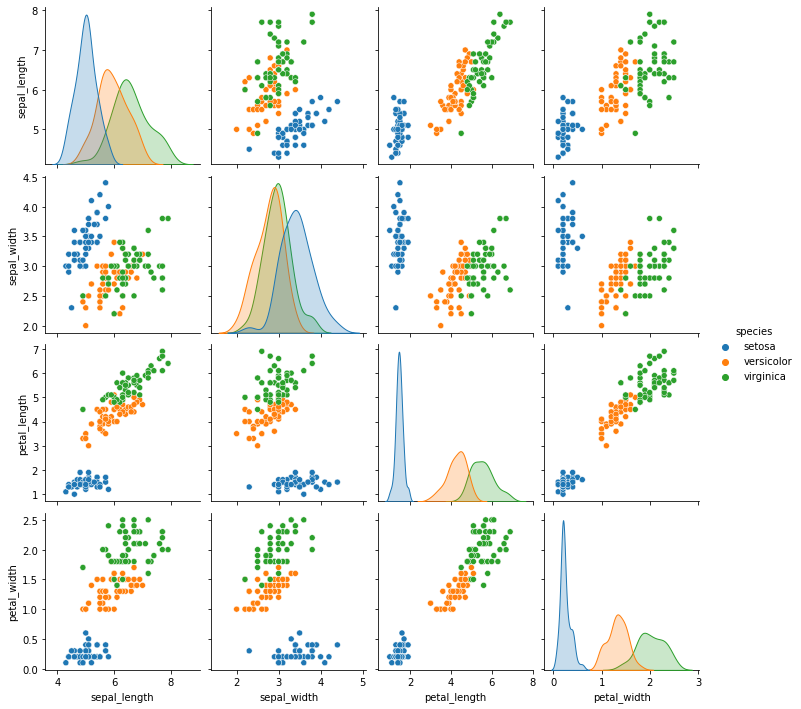

In [145]:
# Creating a pairplot with Seaborn
sns.pairplot(df, hue='species')
plt.show()

In [146]:
#this would transfor the feature to values insted of names

from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(
                                iris_data['Species'])

print(iris_data.head())

   Sepal.lengh  Sepal.width  Petal.Length  Petal.width  Species
0          5.1          3.5           1.4          0.2        0
1          4.9          3.0           1.4          0.2        0
2          4.7          3.2           1.3          0.2        0
3          4.6          3.1           1.5          0.2        0
4          5.0          3.6           1.4          0.2        0


In [147]:

#Convert input to numpy array
np_iris = iris_data.to_numpy()

#Separate feature and target variables
X_data = np_iris[:,0:4] #all rows and from column 0 to 3
Y_data=np_iris[:,4] #all rows and only column 4

print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])

#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables applied
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array (one calumn for each feature)
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])

#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10, random_state=42, stratify=Y_data) 
#random_state is seed to be rep. stratify preserve the proportion of target as in original dataset, in the train and test datasets as well. 

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Features before scaling :
------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
------------------------------------
[0. 0. 0. 0. 0.]

Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after one-hot-encoding :
------------------------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Train Test Dimensions:
------------------------------------
(135, 4) (135, 3) (15, 4) (15, 3)


In [148]:
#Cluster Sampling with pandas and np. Didn't work (DW) Try StratifiedShuffleSplit(n_splits=5, random_state=0, ...)


import pandas as pd
import numpy as np

#make this example reproducible
np.random.seed(0)

#create DataFrame
df = pd.DataFrame({'tour': np.repeat(np.arange(1,11), 20),
                   'experience': np.random.normal(loc=7, scale=1, size=200)})

#view first six rows of DataFrame
print(df.head(30))

#randomly choose 4 tour groups out of the 10
clusters = np.random.choice(np.arange(1,11), size=4, replace=False)

#define sample as all members who belong to one of the 4 tour groups
cluster_sample = df[df['tour'].isin(clusters)]

#view first six rows of sample
print(cluster_sample.head(30))



#find how many observations came from each tour group
print(cluster_sample['tour'].value_counts())



    tour  experience
0      1    8.764052
1      1    7.400157
2      1    7.978738
3      1    9.240893
4      1    8.867558
5      1    6.022722
6      1    7.950088
7      1    6.848643
8      1    6.896781
9      1    7.410599
10     1    7.144044
11     1    8.454274
12     1    7.761038
13     1    7.121675
14     1    7.443863
15     1    7.333674
16     1    8.494079
17     1    6.794842
18     1    7.313068
19     1    6.145904
20     2    4.447010
21     2    7.653619
22     2    7.864436
23     2    6.257835
24     2    9.269755
25     2    5.545634
26     2    7.045759
27     2    6.812816
28     2    8.532779
29     2    8.469359
     tour  experience
0       1    8.764052
1       1    7.400157
2       1    7.978738
3       1    9.240893
4       1    8.867558
5       1    6.022722
6       1    7.950088
7       1    6.848643
8       1    6.896781
9       1    7.410599
10      1    7.144044
11      1    8.454274
12      1    7.761038
13      1    7.121675
14      1    7.4438

In [149]:
iris_data.head()

,Sepal.lengh,Sepal.width,Petal.Length,Petal.width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 4.3. Creating a Model

Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [150]:

from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### 4.4. Training and evaluating the Model

Training the model involves defining various training models and then perform 
forward and back propagation.


Training Progress:
------------------------------------
Epoch 1/10
7/7 [==============================] - 1s 54ms/step - loss: 0.8241 - accuracy: 0.7222 - val_loss: 0.6306 - val_accuracy: 0.7778
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5487 - accuracy: 0.8611 - val_loss: 0.5054 - val_accuracy: 0.7778
Epoch 3/10
7/7 [==============================] - 0s 9ms/step - loss: 0.4364 - accuracy: 0.8611 - val_loss: 0.4414 - val_accuracy: 0.7778
Epoch 4/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3732 - accuracy: 0.8889 - val_loss: 0.3996 - val_accuracy: 0.7778
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3287 - accuracy: 0.8796 - val_loss: 0.3716 - val_accuracy: 0.7778
Epoch 6/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2963 - accuracy: 0.9074 - val_loss: 0.3430 - val_accuracy: 0.8148
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2757 - accuracy: 0.8889 - val_loss: 0.3198

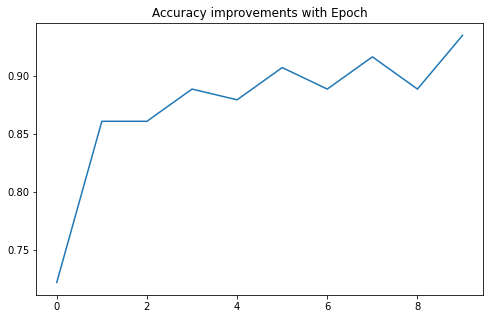


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 21ms/step - loss: 0.2923 - accuracy: 0.8667


[0.29234379529953003, 0.8666666746139526]

In [151]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

### 4.5. Saving and Loading Models

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [152]:
#Saving a model
    
model.save("iris_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save/assets


INFO:tensorflow:Assets written to: iris_save/assets


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### 4.6. Predictions with Deep Learning Models

In [153]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


Raw Prediction Output (Probabilities) : [[0.03269489 0.55821055 0.40909463]]
Prediction is  [1]


Let's try  L1 and L2 Regularization | Lasso, Ridge

In [154]:
# Suppress warning for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [155]:
#explore dataset

iris_data.nunique()

Sepal.lengh     35
Sepal.width     23
Petal.Length    43
Petal.width     22
Species          3
dtype: int64

In [156]:
iris_data.shape

(150, 5)

In [157]:
# is any null value?
iris_data.isna().sum()

Sepal.lengh     0
Sepal.width     0
Petal.Length    0
Petal.width     0
Species         0
dtype: int64

In [158]:
# to fullfill with 0
cols_to_fill_zero = ['Sepal.lengh','Sepal.width']
iris_data[cols_to_fill_zero] = iris_data[cols_to_fill_zero].fillna(0)

iris_data.isna().sum()

Sepal.lengh     0
Sepal.width     0
Petal.Length    0
Petal.width     0
Species         0
dtype: int64

In [159]:
# to fullfill with avg

#iris_data.rename(columns={'Petal_Length':'Petal.Length'})

print(iris_data.head())

iris_data['Petal.Length'] = iris_data['Petal.Length'].fillna(iris_data[['Petal.Length']].mean())

iris_data['Petal.Length'] = iris_data['Petal.Length'].fillna(iris_data['Petal.Length'].mean())


iris_data.isna().sum()

   Sepal.lengh  Sepal.width  Petal.Length  Petal.width  Species
0          5.1          3.5           1.4          0.2        0
1          4.9          3.0           1.4          0.2        0
2          4.7          3.2           1.3          0.2        0
3          4.6          3.1           1.5          0.2        0
4          5.0          3.6           1.4          0.2        0


Sepal.lengh     0
Sepal.width     0
Petal.Length    0
Petal.width     0
Species         0
dtype: int64

In [160]:
#drop null

iris_data.dropna(inplace=True)
iris_data.isna().sum()

Sepal.lengh     0
Sepal.width     0
Petal.Length    0
Petal.width     0
Species         0
dtype: int64

In [161]:
#Dummie (hot encoder) Create a separete 
# to a new column each features that could split example gender.
# male_geneder:0|1 female_gender:0|1

iris_data = pd.get_dummies(iris_data, drop_first=True)

print(iris_data.head())

   Sepal.lengh  Sepal.width  Petal.Length  Petal.width  Species
0          5.1          3.5           1.4          0.2        0
1          4.9          3.0           1.4          0.2        0
2          4.7          3.2           1.3          0.2        0
3          4.6          3.1           1.5          0.2        0
4          5.0          3.6           1.4          0.2        0


In [162]:
# create dependence and independence variables
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [163]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3,random_state=42, stratify=Y_data) #0.3 is 30% reserved for test. Popular integer random seeds are 0 and 42.

In [164]:
#regular linera regression model

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(train_X,train_y)


In [165]:
reg.score(test_X,test_y)

0.9291846678330448

In [166]:
reg.score(train_X,train_y)

#if the training value is high compare with the test this indicate is overfiting


0.9301131405836547

In [167]:
#L1 is lasso Add a absolute theta value in the error (MSE)

from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1) #alpha ini random 50
lasso_reg.fit(train_X,train_y)


Lasso(alpha=50, max_iter=100, tol=0.1)

In [168]:
lasso_reg.score(test_X,test_y)

0.0

In [169]:
lasso_reg.score(train_X,train_y)
# in this cases ins not effective beacuse is not over fitting

0.0

In [170]:
# L2 Ridge
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1) #alpha ini random 50
ridge_reg.fit(train_X,train_y)


Ridge(alpha=50, max_iter=100, tol=0.1)

In [171]:
ridge_reg.score(test_X,test_y)

0.9043444739216975

In [172]:
ridge_reg.score(train_X,train_y)
# in this cases is effective reducing score beacuse

0.8999800088040569

In [173]:
#Load up all the common functions. Required to execute other experiments
#Please reload if changes are made to the functions
%run Common_Experiment_Functions.ipynb

## 2.2 Epoch and Batch Sizes

In [174]:
#Initialize the measures
accuracy_measures = {}

for batch_size in range(16,128,16):
    
    #Load default configuration
    model_config = base_model_config()
    #Acquire and process input data
    X,Y = get_data()
    
    #set epoch to 20
    model_config["EPOCHS"]=20
    #Set batch size to experiment value
    model_config["BATCH_SIZE"] = batch_size
    model_name = "Batch-Size-" + str(batch_size)
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]



******************************************************
Model: "Batch-Size-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Batch-Size-32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)         

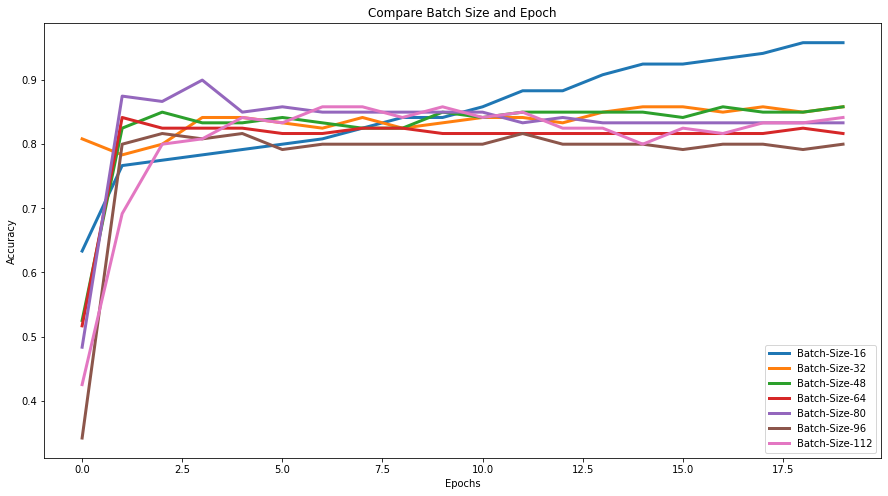

In [175]:
plot_graph(accuracy_measures, "Compare Batch Size and Epoch")

## 2.3. Layers in a Network

In [176]:
accuracy_measures = {}
layer_list =[]
for layer_count in range(1,6):
    
    #32 nodes in each layer
    layer_list.append(32)
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Layers-" + str(layer_count)
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]




******************************************************
Model: "Layers-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Output-Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Layers-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 32)                1056   

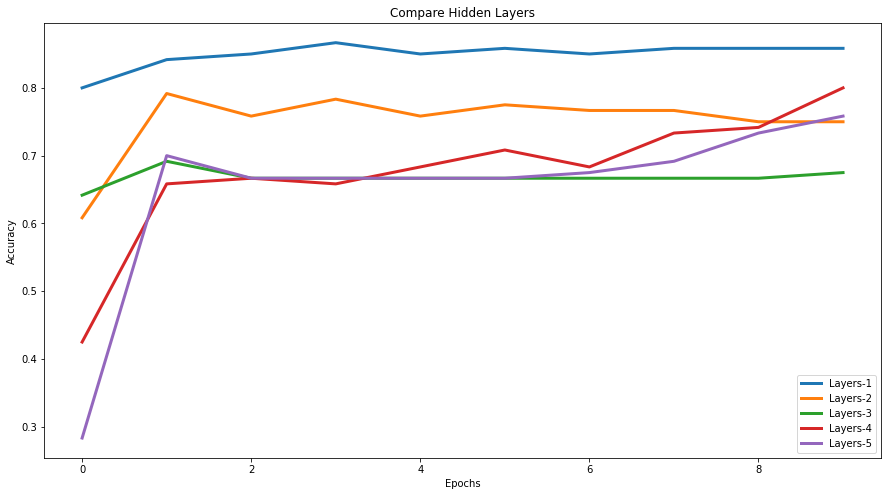

In [177]:
plot_graph(accuracy_measures, "Compare Hidden Layers")

## 2.4 Nodes in a Layer

In [178]:
accuracy_measures = {}

for node_count in range(8,40,8):
    
    #have 2 hidden layers in the networks
    layer_list =[]
    for layer_count in range(2):
        layer_list.append(node_count)
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Nodes-" + str(node_count)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]



******************************************************
Model: "Nodes-8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 8)                 40        
                                                                 
 Dense-Layer-1 (Dense)       (None, 8)                 72        
                                                                 
 Output-Layer (Dense)        (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Nodes-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 16)                80      

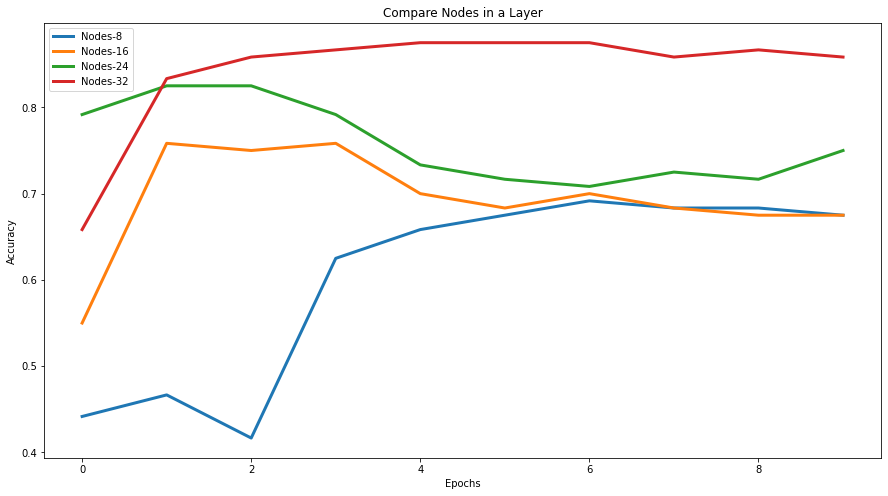

In [179]:

plot_graph(accuracy_measures, "Compare Nodes in a Layer")

## 2.5 Choosing Activation Functions

In [180]:
accuracy_measures = {}

activation_list = ['relu','sigmoid','tanh']

for activation in activation_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["HIDDEN_ACTIVATION"] = activation
    model_name = "Model-" + activation
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures["Model-" + activation] = history.history["accuracy"]



******************************************************
Model: "Model-relu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Model-sigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)            

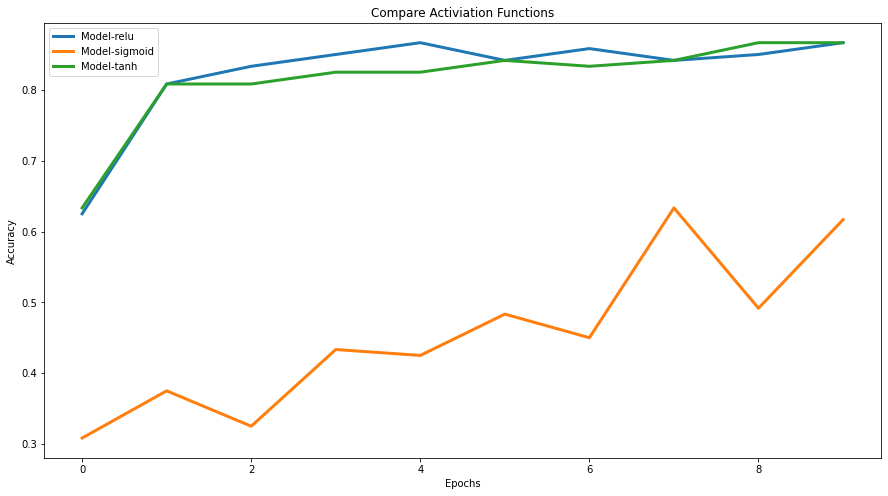

In [181]:

plot_graph(accuracy_measures, "Compare Activiation Functions")

## 2.6. Weights Initialization

In [182]:
accuracy_measures = {}

initializer_list = ['random_normal','zeros','ones',"random_uniform"]
for initializer in initializer_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["WEIGHTS_INITIALIZER"] = initializer
    model_name = "Model-" + initializer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]





******************************************************
Model: "Model-random_normal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Model-zeros"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)     

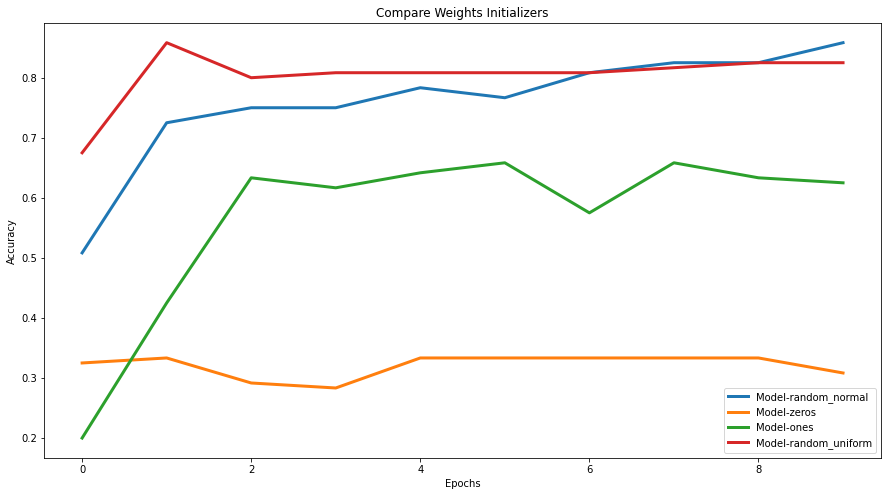

In [183]:
plot_graph(accuracy_measures, "Compare Weights Initializers")

In [184]:
#Load up all the common functions. Required to execute other experiments
#Please reload if changes are made to the functions
%run Common_Experiment_Functions.ipynb

## 3.2. Batch Normalization 

In [185]:
accuracy_measures = {}

normalization_list = ['none','batch']
for normalization in normalization_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["NORMALIZATION"] = normalization
    model_name="Normalization-" + normalization
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]





******************************************************
Model: "Normalization-none"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Normalization-batch"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 3

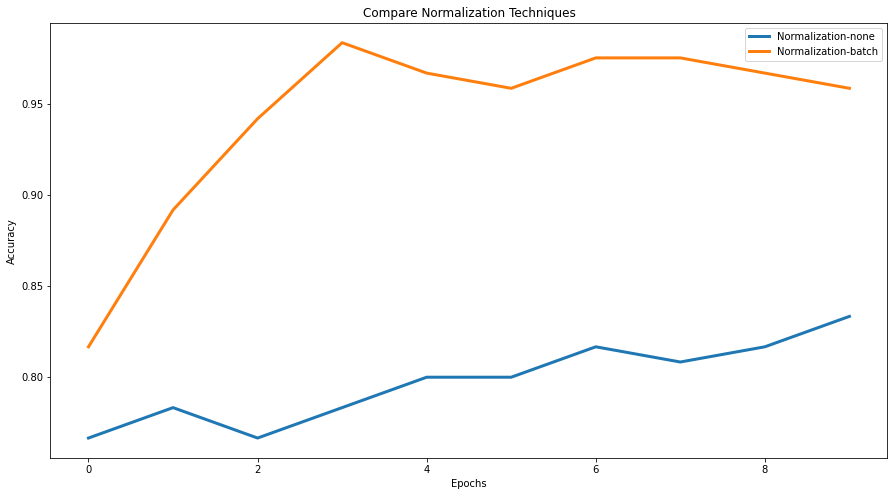

In [186]:
plot_graph(accuracy_measures, "Compare Normalization Techniques")

## 3.4 Optimizers

In [187]:

accuracy_measures = {}

optimizer_list = ['sgd','rmsprop','adam','adagrad']
for optimizer in optimizer_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["OPTIMIZER"] = optimizer
    model_name = "Optimizer-" + optimizer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]





******************************************************
Model: "Optimizer-sgd"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Optimizer-rmsprop"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)     

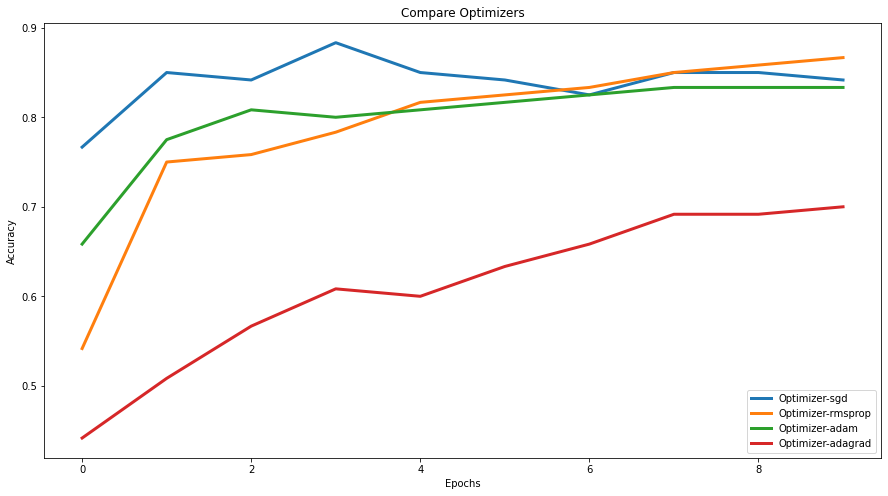

In [188]:
plot_graph(accuracy_measures, "Compare Optimizers")

## 3.6. Learning Rates

In [189]:

accuracy_measures = {}

learning_rate_list = [0.001, 0.005,0.01,0.1,0.5]
for learning_rate in learning_rate_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["LEARNING_RATE"] = learning_rate
    model_name="Learning-Rate-" + str(learning_rate)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #accuracy
    accuracy_measures[model_name] = history.history["accuracy"]




******************************************************
Model: "Learning-Rate-0.001"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Learning-Rate-0.005"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 

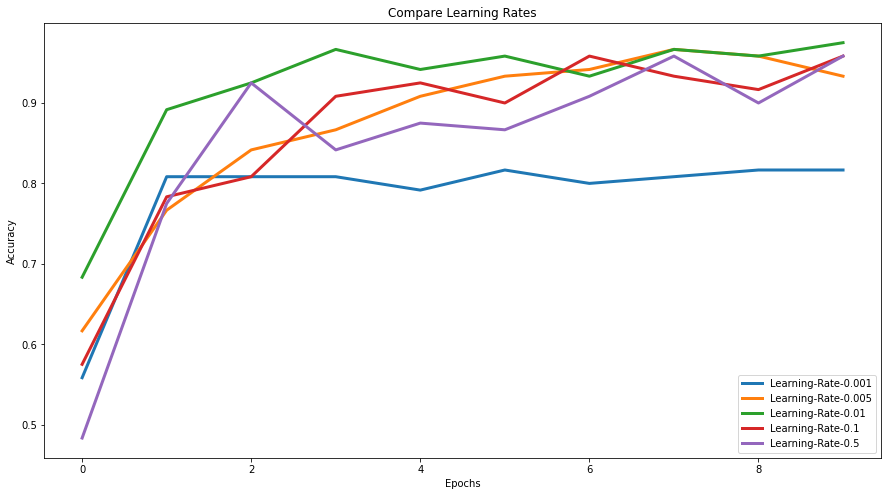

In [190]:
plot_graph(accuracy_measures, "Compare Learning Rates")

In [191]:
#Load up all the common functions. Required to execute other experiments
#Please reload if changes are made to the functions
%run Common_Experiment_Functions.ipynb

## 4.3. Regularization

In [192]:
accuracy_measures = {}

regularizer_list = ['l1','l2','l1_l2']
for regularizer in regularizer_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["REGULARIZER"] = regularizer
    model_config["EPOCHS"]=25
    model_name = "Regularizer-" + regularizer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Switch to validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]




******************************************************
Model: "Regularizer-l1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Regularizer-l2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)       

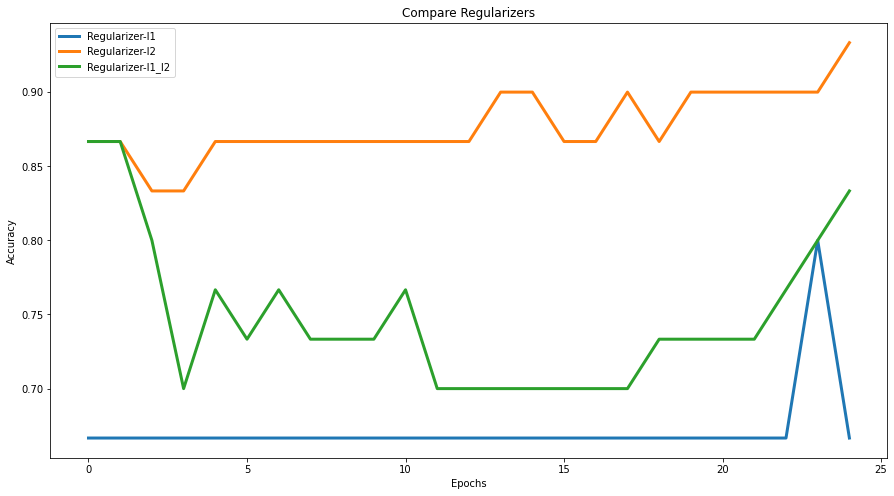

In [193]:
plot_graph(accuracy_measures, "Compare Regularizers")

## 4.5. Dropout

In [194]:
accuracy_measures = {}

dropout_list = [0.0, 0.1, 0.2, 0.5]
for dropout in dropout_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["DROPOUT_RATE"] = dropout
    model_config["EPOCHS"]=25
    model_name="Dropout-" + str(dropout)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Using validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]



******************************************************
Model: "Dropout-0.0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Dropout-0.1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)             

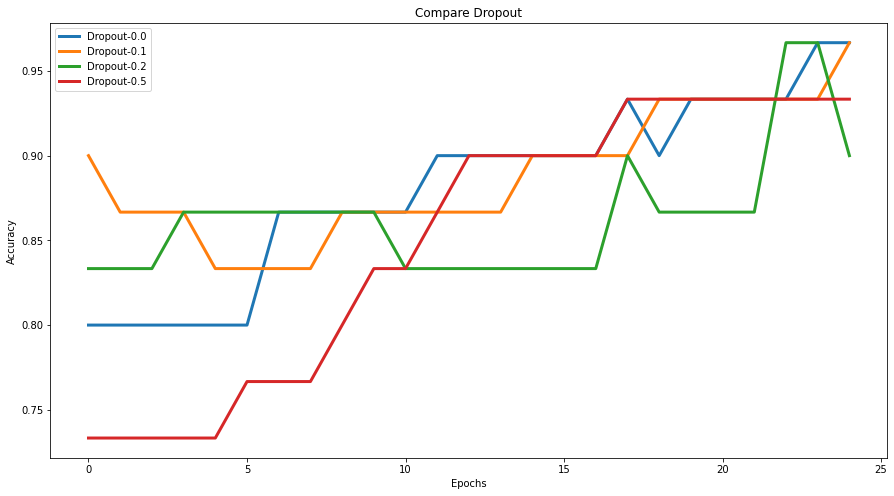

In [195]:
plot_graph(accuracy_measures, "Compare Dropout")

In [196]:
#Install required packages
!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

In [197]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#---------------------------------------------------------------------
#Function to convert Flower names to numeric values
#---------------------------------------------------------------------
def type_to_numeric(x):
    if x=='setosa':
        return 0
    if x=='versicolor':
        return 1
    else :
        return 2

#---------------------------------------------------------------------
#Function to read data and process. Get ready for Deep Learning
#---------------------------------------------------------------------
def get_data():
    
    iris_data = pd.read_csv("iris.csv")
    
    iris_data.dtypes
    iris_data.describe()
    iris_data.head()
    
    #Use a Label encoder to convert String to numeric values for the target variable

    label_encoder = preprocessing.LabelEncoder()
    iris_data['Species'] = label_encoder.fit_transform(
                                    iris_data['Species'])
    
    #Convert input to numpy array
    np_iris = iris_data.to_numpy()
    
    #Separate feature and target variables
    X_data = np_iris[:,0:4]
    Y_data=np_iris[:,4]
    
    #Create a scaler model that is fit on the input data.
    scaler = StandardScaler().fit(X_data)
    
    #Scale the numeric feature variables
    X_data = scaler.transform(X_data)
    
    #Convert target variable as a one-hot-encoding array
    Y_data = tf.keras.utils.to_categorical(Y_data,3)

    #Return Feature and Target variables
    return X_data,Y_data

#---------------------------------------------------------------------
#Function to create the default configuration for the model. This will be overridden as 
#required during experimentation
#---------------------------------------------------------------------
def base_model_config():
    model_config = {
            "HIDDEN_NODES" : [32,64],
            "HIDDEN_ACTIVATION" : "relu",
            "OUTPUT_NODES" : 3,
            "OUTPUT_ACTIVATION" : "softmax",
            "WEIGHTS_INITIALIZER" : "random_normal",
            "BIAS_INITIALIZER" : "zeros",
            "NORMALIZATION" : "none",
            "OPTIMIZER" : "rmsprop",
            "LEARNING_RATE" : 0.001,
            "REGULARIZER" : None,
            "DROPOUT_RATE" : 0.0,
            "EPOCHS" : 10,
            "BATCH_SIZE" : 16,
            "VALIDATION_SPLIT" : 0.2,
            "VERBOSE" : 0,
            "LOSS_FUNCTION" : "categorical_crossentropy",
            "METRICS" : ["accuracy"]
            }
    return model_config

#---------------------------------------------------------------------
# Function to create an optimizer based on the optimizer name and learning rate
#---------------------------------------------------------------------
def get_optimizer(optimizer_name, learning_rate):
    #'sgd','rmsprop','adam','adagrad'
    optimizer=None
    
    if optimizer_name == 'adagrad': 
        optimizer = keras.optimizers.Adagrad(learning_rate=learning_rate)

    elif 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    elif'adam' :
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
        
    else :
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
            
    return optimizer
    
    
#---------------------------------------------------------------------
# Function to create a model and fit the model
#---------------------------------------------------------------------

def create_and_run_model(model_config,X,Y,model_name) :
    
    model=tf.keras.models.Sequential(name=model_name)
    
    for layer in range(len(model_config["HIDDEN_NODES"])):
        
        if (layer == 0):
            model.add(
                    keras.layers.Dense(model_config["HIDDEN_NODES"][layer],
                    input_shape=(X.shape[1],),
                    name="Dense-Layer-" + str(layer),
                    kernel_initializer = model_config["WEIGHTS_INITIALIZER"],
                    bias_initializer = model_config["BIAS_INITIALIZER"],
                    kernel_regularizer=model_config["REGULARIZER"],
                    activation=model_config["HIDDEN_ACTIVATION"]))
        else:
            
            if ( model_config["NORMALIZATION"] == "batch"):
                model.add(keras.layers.BatchNormalization())
                
            if ( model_config["DROPOUT_RATE"] > 0.0 ):
                model.add(keras.layers.Dropout(model_config["DROPOUT_RATE"]))
                
            model.add(
                    keras.layers.Dense(model_config["HIDDEN_NODES"][layer],
                    name="Dense-Layer-" + str(layer),
                    kernel_initializer = model_config["WEIGHTS_INITIALIZER"],
                    bias_initializer = model_config["BIAS_INITIALIZER"],
                    kernel_regularizer=model_config["REGULARIZER"],
                    activation=model_config["HIDDEN_ACTIVATION"])) 
            

            
    model.add(keras.layers.Dense(model_config["OUTPUT_NODES"],
                    name="Output-Layer",
                    activation=model_config["OUTPUT_ACTIVATION"]))
    
    optimizer = get_optimizer( model_config["OPTIMIZER"],
                              model_config["LEARNING_RATE"])
    
    model.compile(loss=model_config["LOSS_FUNCTION"],
                  optimizer=optimizer,
                   metrics=model_config["METRICS"])
    
    print("\n******************************************************")
    model.summary()
    
    X_train, X_val, Y_train, Y_val =train_test_split(
                        X,Y,
                        stratify=Y,
                        random_state=42,
                        test_size=model_config["VALIDATION_SPLIT"]) 
    
    history=model.fit(X_train,
          Y_train,
          batch_size=model_config["BATCH_SIZE"],
          epochs=model_config["EPOCHS"],
          verbose=model_config["VERBOSE"],
          validation_data= (X_val, Y_val))
    
    return history

#---------------------------------------------------------------------
#Function to plot a graph based on the results derived
#---------------------------------------------------------------------

def plot_graph(accuracy_measures, title):
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(15, 8))
    for experiment in accuracy_measures.keys():
        plt.plot(accuracy_measures[experiment], 
                 label=experiment,
                    linewidth=3)
        
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    

In [198]:
#Load up all the common functions. Required to execute other experiments
#Please reload if changes are made to the functions
#%run Common_Experiment_Functions.ipynb

## 5.2 Acquire and Process Data

In [199]:
import pandas as pd
import os
import tensorflow as tf

def get_rca_data():
    #Load the data file into a Pandas Dataframe
    symptom_data = pd.read_csv("root_cause_analysis.csv")

    #Explore the data loaded
    #print(symptom_data.dtypes)
    #symptom_data.head()

    from sklearn import preprocessing
    from sklearn.model_selection import train_test_split

    #encode label

    label_encoder = preprocessing.LabelEncoder()
    symptom_data['ROOT_CAUSE'] = label_encoder.fit_transform(
                                    symptom_data['ROOT_CAUSE'])

    #Convert Pandas DataFrame to a numpy vector
    np_symptom = symptom_data.to_numpy().astype(float)

    #Extract the feature variables (X)
    X_data = np_symptom[:,1:8]

    #Extract the target variable (Y), conver to one-hot-encoding
    Y_data=np_symptom[:,8]
    Y_data = tf.keras.utils.to_categorical(Y_data,3)

    return X_data,Y_data

## 5.3. Tuning the network

### 5.3.1. Layers in the network

In [200]:
accuracy_measures = {}
layer_list =[]
for layer_count in range(1,6):
    
    #32 nodes in each layer
    layer_list.append(32)
    
    model_config = base_model_config()
    X,Y = get_rca_data()
    
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Layers-" + str(layer_count)
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Layers-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Output-Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 355
Trainable params: 355
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Layers-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 32)                1056   

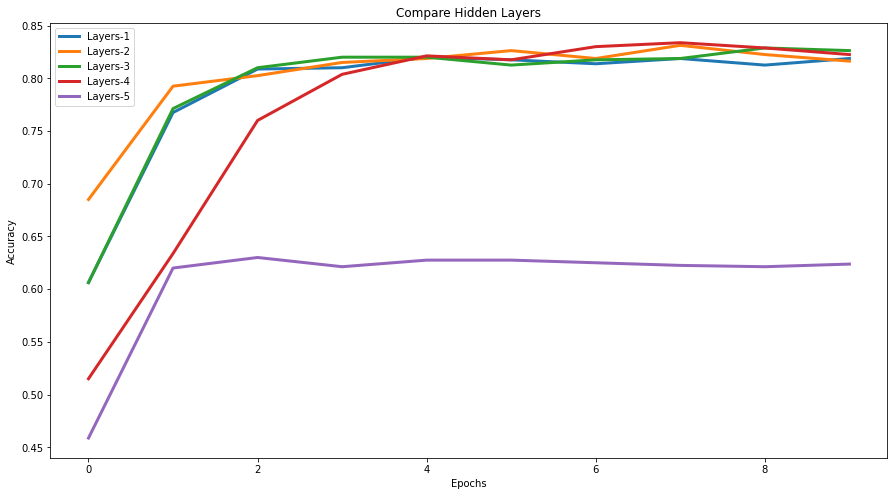

In [201]:
plot_graph(accuracy_measures, "Compare Hidden Layers")
#the best option is layer 2 with the highest accuracy with little epochs in this run. Could variate 

### 5.3.2 Nodes in a Layer

In [202]:
accuracy_measures = {}

node_increment=8

for node_count in range(1,5):
    
    #have 2 hidden layers in the networks as selected above
    layer_list =[]
    for layer_count in range(2):
        layer_list.append(node_count * node_increment)
    
    model_config = base_model_config()
    X,Y = get_rca_data()
    
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Nodes-" + str(node_count * node_increment)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Nodes-8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 8)                 64        
                                                                 
 Dense-Layer-1 (Dense)       (None, 8)                 72        
                                                                 
 Output-Layer (Dense)        (None, 3)                 27        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Nodes-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 16)                128     

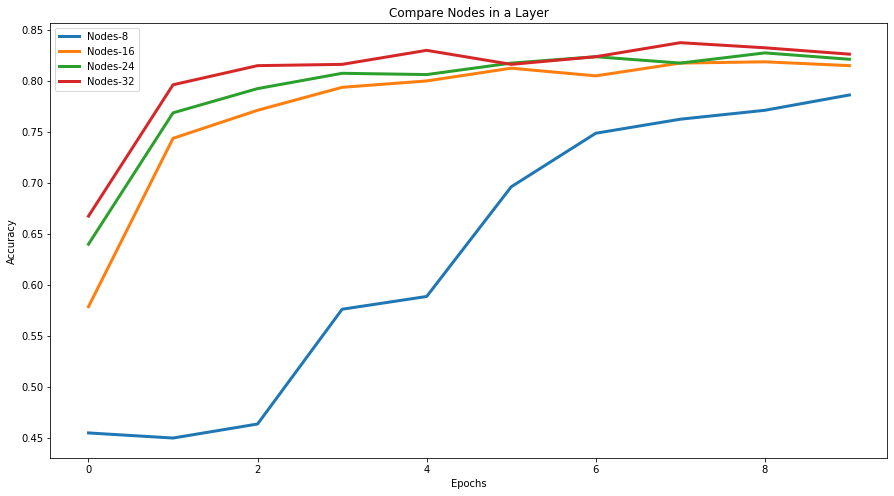

In [203]:
plot_graph(accuracy_measures, "Compare Nodes in a Layer")
#best this case 24 

## 5.4. Tuning Back Propagation

## 5.4.1. Optimizers

In [204]:
accuracy_measures = {}

optimizer_list = ['sgd','rmsprop','adam','adagrad']
for optimizer in optimizer_list:
    
    model_config = base_model_config()
    X,Y = get_rca_data()
    
    model_config["OPTIMIZER"] = optimizer
    model_name = "Optimizer-" + optimizer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Optimizer-sgd"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,563
Trainable params: 2,563
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Optimizer-rmsprop"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)     

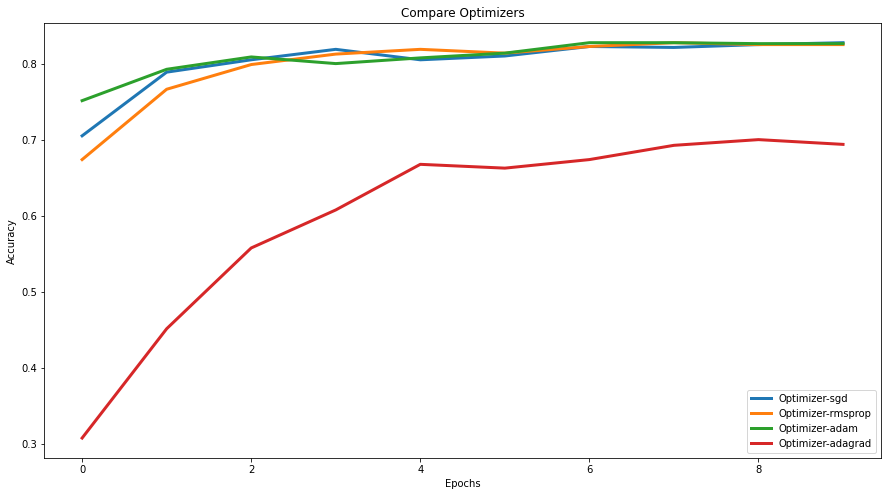

In [205]:
plot_graph(accuracy_measures, "Compare Optimizers")
#ADAM

### 5.4.2. Learning Rates

In [206]:

accuracy_measures = {}

learning_rate_list = [0.001, 0.005,0.01,0.1,0.5]
for learning_rate in learning_rate_list:
    
    model_config = base_model_config()
    X,Y = get_rca_data()
    
    #Fix Optimizer to the one chosen above
    model_config["OPTIMIZER"]="rmsprop"
    model_config["LEARNING_RATE"] = learning_rate
    model_name="Learning-Rate-" + str(learning_rate)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Using validation accuracy
    accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Learning-Rate-0.001"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,563
Trainable params: 2,563
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Learning-Rate-0.005"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 

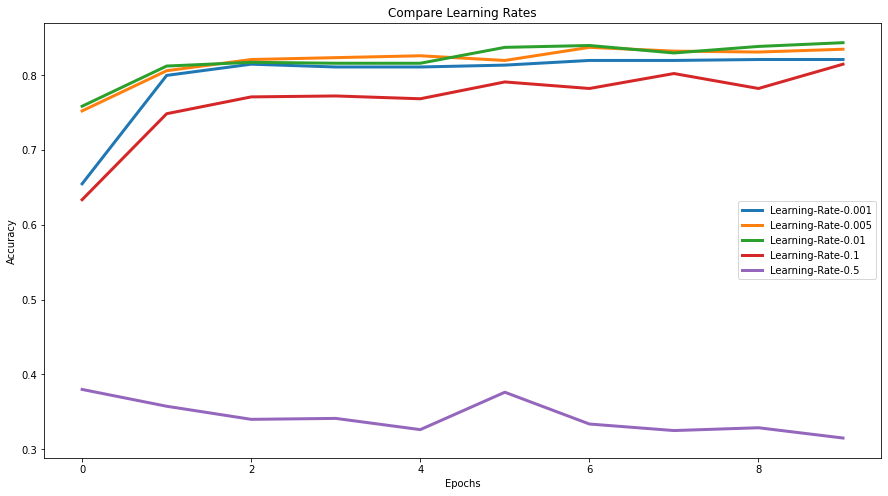

In [207]:
plot_graph(accuracy_measures, "Compare Learning Rates")
#0.01

## 5.5. Avoiding Overfitting

### 5.5.1. Regularizer

In [208]:
accuracy_measures = {}

regularizer_list = [None,'l1','l2','l1_l2']
for regularizer in regularizer_list:
    
    model_config = base_model_config()
    X,Y = get_rca_data()
    
    model_config["REGULARIZER"] = regularizer
    model_name = "Regularizer-" + str(regularizer)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Switch to validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]


******************************************************
Model: "Regularizer-None"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,563
Trainable params: 2,563
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Regularizer-l1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)     

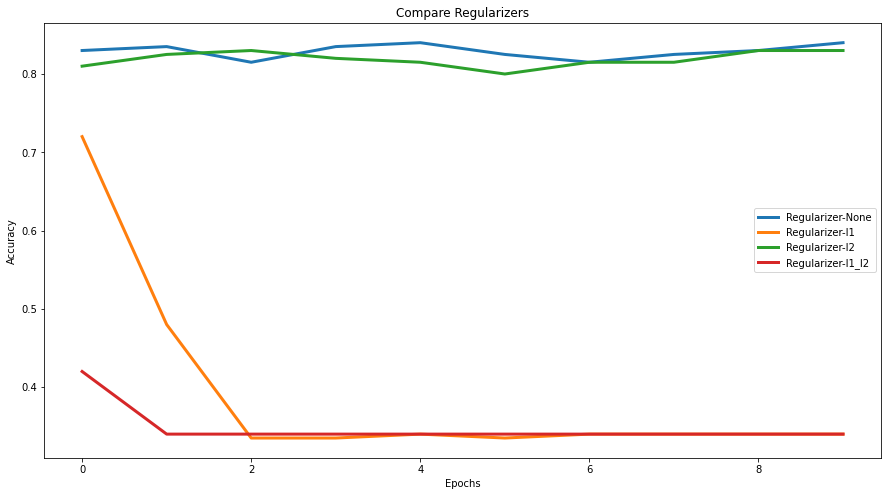

In [209]:
plot_graph(accuracy_measures, "Compare Regularizers")
#L2

### 5.5.2. Dropout

In [210]:
accuracy_measures = {}

dropout_list = [0.0, 0.1, 0.2, 0.5]
for dropout in dropout_list:
    
    model_config = base_model_config()
    X,Y = get_rca_data()
    
    #Use the regularizer chosen above
    model_config["REGULARIZER"] = "l2"
    model_config["DROPOUT_RATE"] = dropout
    model_name="Dropout-" + str(dropout)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Using validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]


******************************************************
Model: "Dropout-0.0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,563
Trainable params: 2,563
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Dropout-0.1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)             

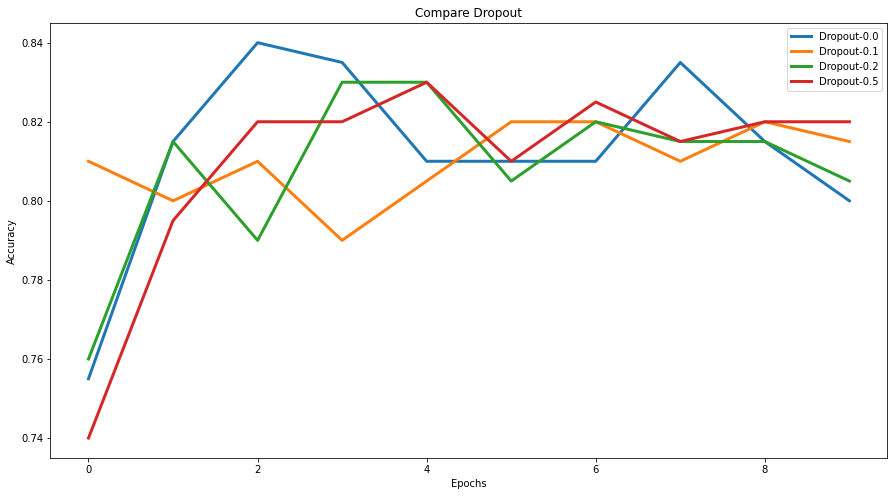

In [211]:
plot_graph(accuracy_measures, "Compare Dropout")
#0.5, #0.0

## 5.6. Building the final model

In [212]:
accuracy_measures = {}

#Base Minimal Model
model_config = base_model_config()
model_config["HIDDEN_NODES"] = [16]
model_config["NORMALIZATION"] = None
model_config["OPTIMIZER"] = "rmsprop"
model_config["LEARNING_RATE"] = 0.001
model_config["REGULARIZER"]=None
model_config["DROPOUT_RATE"] = 0.0

X,Y = get_rca_data()

model_name = "Base-Model-" + str(layer_count)

history=create_and_run_model(model_config,X,Y,model_name)
    
accuracy_measures[model_name] = history.history["accuracy"]

#Adding all optimizations
model_config = base_model_config()
model_config["HIDDEN_NODES"] = [32,32]
model_config["NORMALIZATION"] = "batch"
model_config["OPTIMIZER"] = "rmsprop"
model_config["LEARNING_RATE"] = 0.001
model_config["REGULARIZER"]="l2"
model_config["DROPOUT_RATE"] = 0.2

X,Y = get_rca_data()

model_name = "Optimized-Model-" + str(layer_count)

history=create_and_run_model(model_config,X,Y,model_name)
    
accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Base-Model-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 16)                128       
                                                                 
 Output-Layer (Dense)        (None, 3)                 51        
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Optimized-Model-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 batch_normalization_1 (Batc  (None, 32)         

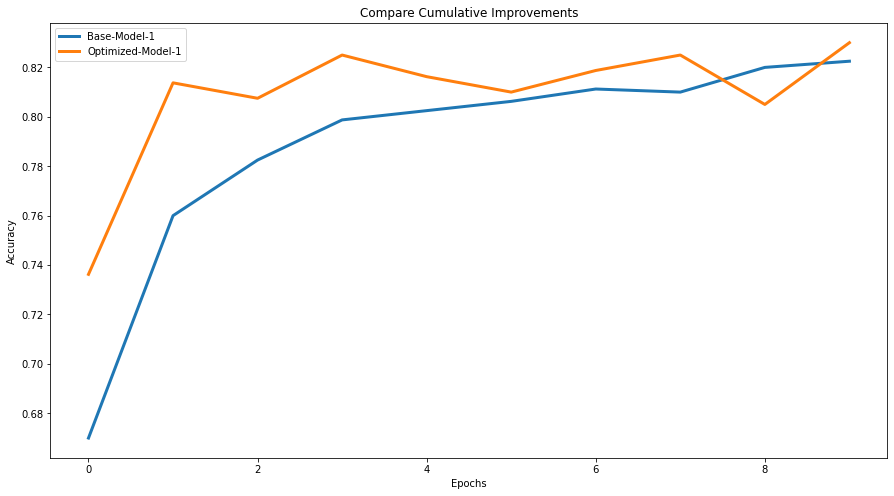

In [213]:
plot_graph(accuracy_measures, "Compare Cumulative Improvements")

In [214]:
#now in a matrix.

optimizations=["HIDDEN_NODES",
               "NODES",
               "BATCH_SIZE",
               "EPOCHS"
               "WEIGHTS_INITIALIZER",
               "HIDDEN_ACTIVATION",
               "OPTIMIZER",
               "BATCH_NORMALIZATION",
               "LEARNING_RATE",
               "REGULARIZER",
               "DROPOUT_RATE"] 

accuracy_measures=['accuracy_measures']

In [216]:
#HIDDEN_NODES

accuracy_measures = {}
layer_list =[]


for layer_count in range(1,6):
    
    #32 nodes in each layer
    layer_list.append(32)
    
    model_config = base_model_config()
    X,Y = get_rca_data()
    
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Layers-" + str(layer_count)
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]


#NODES
accuracy_measures = {}

for node_count in range(8,40,8):
    
    #have 2 hidden layers in the networks
    layer_list =[]
    for layer_count in range(2):
        layer_list.append(node_count)
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Nodes-" + str(node_count)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]


#Batch size 
accuracy_measures = {}

for batch_size in range(16,128,16):
    
    #Load default configuration
    model_config = base_model_config()
    #Acquire and process input data
    X,Y = get_data()
    
    #set epoch to 20
    model_config["EPOCHS"]=20
    #Set batch size to experiment value
    model_config["BATCH_SIZE"] = batch_size
    model_name = "Batch-Size-" + str(batch_size)
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]



#Epoch size create...
accuracy_measures = {}

for batch_size in range(16,128,16):
    
    #Load default configuration
    model_config = base_model_config()
    #Acquire and process input data
    X,Y = get_data()
    
    #set epoch to 20
    model_config["EPOCHS"]=20
    #Set batch size to experiment value
    model_config["BATCH_SIZE"] = batch_size
    model_name = "Batch-Size-" + str(batch_size)
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]

#Weights Initialization

accuracy_measures = {}

initializer_list = ['random_normal','zeros','ones',"random_uniform"]
for initializer in initializer_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["WEIGHTS_INITIALIZER"] = initializer
    model_name = "Model-" + initializer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]




#activation function 

accuracy_measures = {}

activation_list = ['relu','sigmoid','tanh']

for activation in activation_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["HIDDEN_ACTIVATION"] = activation
    model_name = "Model-" + activation
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures["Model-" + activation] = history.history["accuracy"]



#optimizer 
accuracy_measures = {}

optimizer_list = ['sgd','rmsprop','adam','adagrad']
for optimizer in optimizer_list:
    
    model_config = base_model_config()
    X,Y = get_rca_data()
    
    model_config["OPTIMIZER"] = optimizer
    model_name = "Optimizer-" + optimizer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]


#Batch Normalization

accuracy_measures = {}

normalization_list = ['none','batch']
for normalization in normalization_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["NORMALIZATION"] = normalization
    model_name="Normalization-" + normalization
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]





#Learning Rates

accuracy_measures = {}

learning_rate_list = [0.001, 0.005,0.01,0.1,0.5]
for learning_rate in learning_rate_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["LEARNING_RATE"] = learning_rate
    model_name="Learning-Rate-" + str(learning_rate)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #accuracy
    accuracy_measures[model_name] = history.history["accuracy"]


# Regularization

accuracy_measures = {}

regularizer_list = ['l1','l2','l1_l2']
for regularizer in regularizer_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["REGULARIZER"] = regularizer
    model_config["EPOCHS"]=25
    model_name = "Regularizer-" + regularizer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Switch to validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]



# Dropout

accuracy_measures = {}

dropout_list = [0.0, 0.1, 0.2, 0.5]
for dropout in dropout_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["DROPOUT_RATE"] = dropout
    model_config["EPOCHS"]=25
    model_name="Dropout-" + str(dropout)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Using validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]


#


******************************************************
Model: "Layers-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Output-Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 355
Trainable params: 355
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Layers-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 32)                1056   

KeyboardInterrupt: ignored

In [217]:
model_config = {
            "HIDDEN_NODES" : [32,64],
            "HIDDEN_ACTIVATION" : "relu",
            "OUTPUT_NODES" : 3,
            "OUTPUT_ACTIVATION" : "softmax",
            "WEIGHTS_INITIALIZER" : "random_normal",
            "BIAS_INITIALIZER" : "zeros",
            "NORMALIZATION" : "none",
            "OPTIMIZER" : "rmsprop",
            "LEARNING_RATE" : 0.001,
            "REGULARIZER" : None,
            "DROPOUT_RATE" : 0.0,
            "EPOCHS" : 10,
            "BATCH_SIZE" : 16,
            "VALIDATION_SPLIT" : 0.2,
            "VERBOSE" : 0,
            "LOSS_FUNCTION" : "categorical_crossentropy",
            "METRICS" : ["accuracy"]
            }

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________

Training Progress:
------------------------------------
Epoch 1/10
7/7 [==============================] - 1s 28ms/step - loss: 0.7985 - accuracy: 0.7222 - val_loss: 0.6200 - val_accuracy: 0.7778
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5254 - accuracy: 0.8611 - val_loss: 0.4969 - v

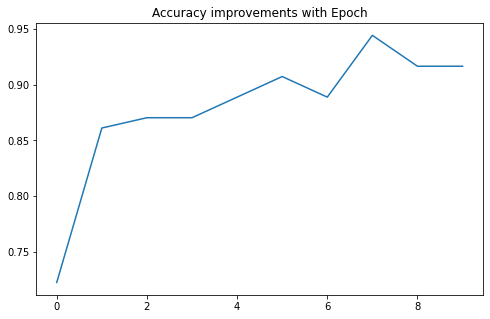


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 20ms/step - loss: 0.2784 - accuracy: 0.8667


INFO:tensorflow:Assets written to: iris_save/assets


INFO:tensorflow:Assets written to: iris_save/assets


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________
Raw Prediction Output (Probabilities) : [[0.03294319 0.5784869  0.3885699 ]]
Prediction is  [1]


In [219]:
#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()



#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)


#----


#Saving a model
    
model.save("iris_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

#---
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

### 4.2. Prepare Input Data for Deep Learning

Perform the following steps for preparing data

1. Load data into a pandas dataframe
2. Convert the dataframe to a numpy array
3. Scale the feature dataset
4. Use one-hot-encoding for the target variable
5. Split into training and test datasets


In [220]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt


#Load Data and review content from a file or from library
#iris_data = pd.read_csv("iris.csv")

iris = load_iris()


#sns

df = sns.load_dataset('iris')

#change names
columns=['Sepal.lengh','Sepal.width','Petal.Length','Petal.width',]

#iris_data = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

#pandas
iris_data = pd.DataFrame(data=iris.data, columns=columns)
#adding the labels
iris_data['Species']=iris.target

#print(iris.target_names)
#print(iris.target)

print("\nLoaded Data :\n------------------------------------")
print(iris_data.head())



Loaded Data :
------------------------------------
   Sepal.lengh  Sepal.width  Petal.Length  Petal.width  Species
0          5.1          3.5           1.4          0.2        0
1          4.9          3.0           1.4          0.2        0
2          4.7          3.2           1.3          0.2        0
3          4.6          3.1           1.5          0.2        0
4          5.0          3.6           1.4          0.2        0


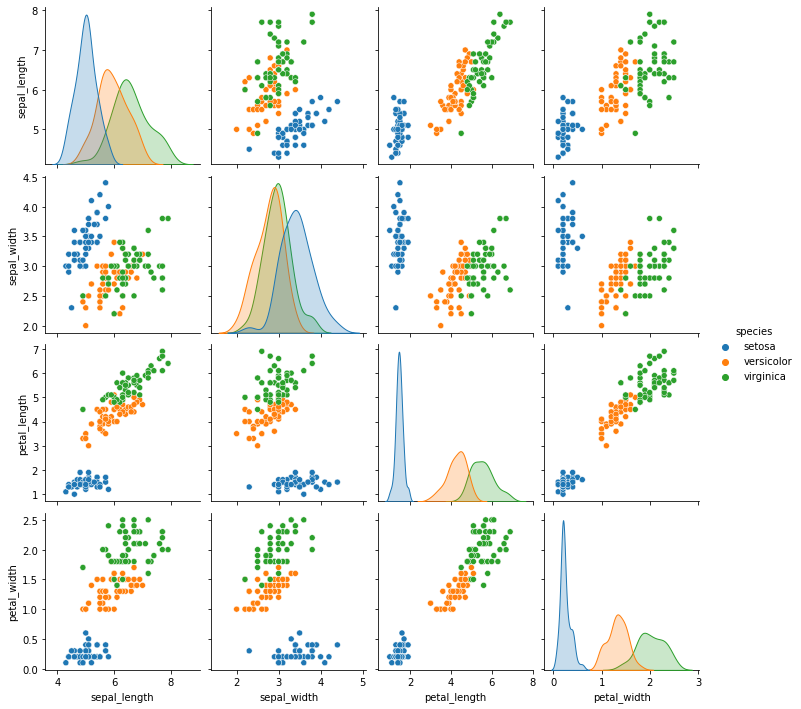

In [221]:
# Creating a pairplot with Seaborn
sns.pairplot(df, hue='species')
plt.show()

In [222]:
#this would transfor the feature to values insted of names

from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(
                                iris_data['Species'])

print(iris_data.head())

   Sepal.lengh  Sepal.width  Petal.Length  Petal.width  Species
0          5.1          3.5           1.4          0.2        0
1          4.9          3.0           1.4          0.2        0
2          4.7          3.2           1.3          0.2        0
3          4.6          3.1           1.5          0.2        0
4          5.0          3.6           1.4          0.2        0


In [223]:

#Convert input to numpy array
np_iris = iris_data.to_numpy()

#Separate feature and target variables
X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]

print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])

#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables applied
X_data = scaler.transform(X_data)


#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])

#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10,random_state=42, stratify=Y_data)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Features before scaling :
------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
------------------------------------
[0. 0. 0. 0. 0.]

Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after one-hot-encoding :
------------------------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Train Test Dimensions:
------------------------------------
(135, 4) (135, 3) (15, 4) (15, 3)


In [224]:
iris_data.head()

,Sepal.lengh,Sepal.width,Petal.Length,Petal.width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 4.3. Creating a Model

Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [225]:

from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### 4.4. Training and evaluating the Model

Training the model involves defining various training models and then perform 
forward and back propagation.


Training Progress:
------------------------------------
Epoch 1/10
7/7 [==============================] - 1s 26ms/step - loss: 0.8372 - accuracy: 0.7315 - val_loss: 0.6164 - val_accuracy: 0.7778
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5339 - accuracy: 0.8426 - val_loss: 0.4856 - val_accuracy: 0.7778
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4167 - accuracy: 0.8796 - val_loss: 0.4140 - val_accuracy: 0.8148
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3507 - accuracy: 0.8796 - val_loss: 0.3747 - val_accuracy: 0.8148
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3061 - accuracy: 0.8704 - val_loss: 0.3484 - val_accuracy: 0.8148
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.2806 - accuracy: 0.9074 - val_loss: 0.3288 - val_accuracy: 0.8148
Epoch 7/10
7/7 [==============================] - 0s 6ms/step - loss: 0.2546 - accuracy: 0.8889 - val_loss: 0.3129

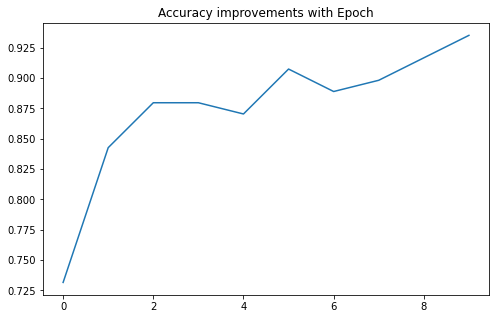


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 24ms/step - loss: 0.2883 - accuracy: 0.8667


[0.28827136754989624, 0.8666666746139526]

In [226]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

### 4.5. Saving and Loading Models

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [227]:
#Saving a model
    
model.save("iris_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save/assets


INFO:tensorflow:Assets written to: iris_save/assets


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### 4.6. Predictions with Deep Learning Models

In [228]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


Raw Prediction Output (Probabilities) : [[0.02428309 0.57062954 0.40508738]]
Prediction is  [1]


Let's try  L1 and L2 Regularization | Lasso, Ridge

In [229]:
# Suppress warning for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [230]:
#explore dataset

iris_data.nunique()

Sepal.lengh     35
Sepal.width     23
Petal.Length    43
Petal.width     22
Species          3
dtype: int64

In [231]:
iris_data.shape

(150, 5)

In [232]:
# is any null value?
iris_data.isna().sum()

Sepal.lengh     0
Sepal.width     0
Petal.Length    0
Petal.width     0
Species         0
dtype: int64

In [233]:
# to fullfill with 0
cols_to_fill_zero = ['Sepal.lengh','Sepal.width']
iris_data[cols_to_fill_zero] = iris_data[cols_to_fill_zero].fillna(0)

iris_data.isna().sum()

Sepal.lengh     0
Sepal.width     0
Petal.Length    0
Petal.width     0
Species         0
dtype: int64

In [234]:
# to fullfill with avg

#iris_data.rename(columns={'Petal_Length':'Petal.Length'})

print(iris_data.head())

iris_data['Petal.Length'] = iris_data['Petal.Length'].fillna(iris_data[['Petal.Length']].mean())

iris_data['Petal.Length'] = iris_data['Petal.Length'].fillna(iris_data['Petal.Length'].mean())


iris_data.isna().sum()

   Sepal.lengh  Sepal.width  Petal.Length  Petal.width  Species
0          5.1          3.5           1.4          0.2        0
1          4.9          3.0           1.4          0.2        0
2          4.7          3.2           1.3          0.2        0
3          4.6          3.1           1.5          0.2        0
4          5.0          3.6           1.4          0.2        0


Sepal.lengh     0
Sepal.width     0
Petal.Length    0
Petal.width     0
Species         0
dtype: int64

In [235]:
#drop null

iris_data.dropna(inplace=True)
iris_data.isna().sum()

Sepal.lengh     0
Sepal.width     0
Petal.Length    0
Petal.width     0
Species         0
dtype: int64

In [236]:
#Dummie (hot encoder) Create a separete 
# to a new column each features that could split example gender.
# male_geneder:0|1 female_gender:0|1

iris_data = pd.get_dummies(iris_data, drop_first=True)

print(iris_data.head())

   Sepal.lengh  Sepal.width  Petal.Length  Petal.width  Species
0          5.1          3.5           1.4          0.2        0
1          4.9          3.0           1.4          0.2        0
2          4.7          3.2           1.3          0.2        0
3          4.6          3.1           1.5          0.2        0
4          5.0          3.6           1.4          0.2        0


In [237]:
# create dependence and independence variables
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [238]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3,random_state=42, stratify=y) #0.3 is 30% reserved for test. Popular integer random seeds are 0 and 42.

In [239]:
#regular linera regression model

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(train_X,train_y)


In [240]:
reg.score(test_X,test_y)

0.9043920340124827

In [241]:
reg.score(train_X,train_y)

#if the training value is high compare with the test this indicate is overfiting


0.9409623258645097

In [242]:
#L1 is lasso Add a absolute theta value in the error (MSE)

from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1) #alpha ini random 50
lasso_reg.fit(train_X,train_y)


Lasso(alpha=50, max_iter=100, tol=0.1)

In [243]:
lasso_reg.score(test_X,test_y)

0.0

In [244]:
lasso_reg.score(train_X,train_y)
# in this cases ins not effective beacuse is not over fitting

0.0

In [245]:
# L2 Ridge
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1) #alpha ini random 50
ridge_reg.fit(train_X,train_y)


Ridge(alpha=50, max_iter=100, tol=0.1)

In [246]:
ridge_reg.score(test_X,test_y)

0.8723378311788585

In [247]:
ridge_reg.score(train_X,train_y)
# in this cases is effective reducing score beacuse

0.9078590607358529